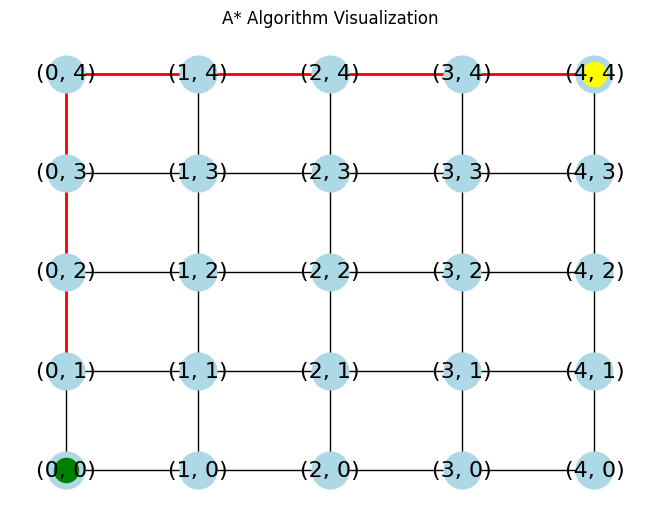

Path found by A*: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Define a grid-based graph
def create_grid_graph(width, height):
    G = nx.grid_2d_graph(width, height)
    return G

# A* algorithm
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

def astar(graph, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))  # (f_score, node)
    came_from = {}

    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0

    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristic(start, goal)

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]  # Return reversed path

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + 1  # Assume cost between neighbors is 1
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return []  # Return an empty path if no path is found

# Visualization function
def draw_graph(graph, path=None, start=None, goal=None):
    pos = {n: n for n in graph.nodes()}
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=16)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)
    if start:
        nx.draw_networkx_nodes(graph, pos, nodelist=[start], node_color='green')
    if goal:
        nx.draw_networkx_nodes(graph, pos, nodelist=[goal], node_color='yellow')

    plt.title('A* Algorithm Visualization')
    plt.show()

# Parameters
width, height = 5, 5
start = (0, 0)
goal = (4, 4)

# Create the grid graph
grid_graph = create_grid_graph(width, height)

# Find the path using A*
path = astar(grid_graph, start, goal)

# Draw the graph with the path
draw_graph(grid_graph, path=path, start=start, goal=goal)

# Print the path
print("Path found by A*:", path)
